# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [4]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

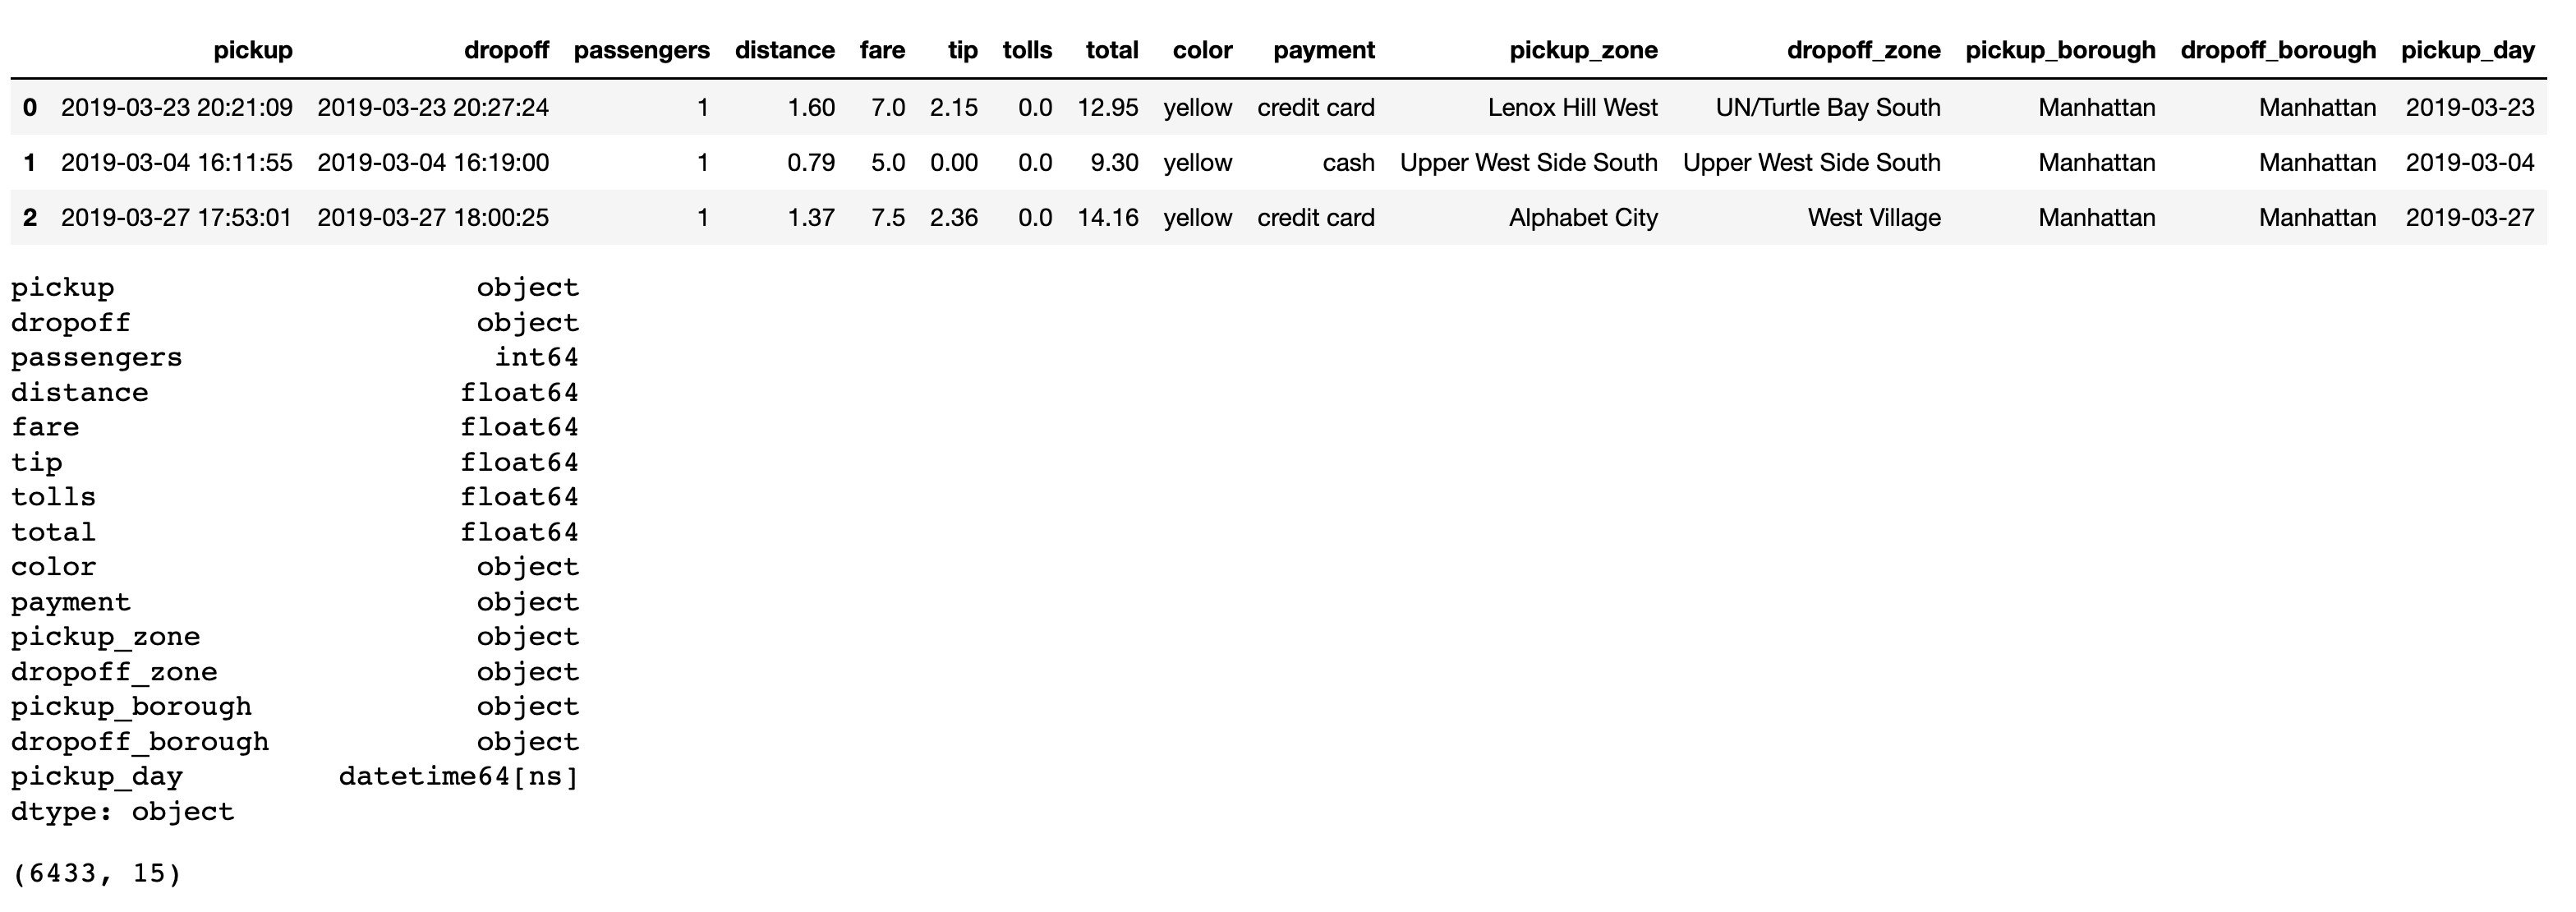

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [6]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

Відповідь:

1. Відсутність даних є нормальним явищем, але причини можуть бути різні, наприклад такі як:
    - не вірно заповнені дані (помилки при заповнені);
    - технічні проблеми;
    - відсутність інформації щодо якогось пункту;
    - відмова від заповнення інформації;
    - забулись заповнити якийсь із пунктів в даних;

2. Для початку я вибрав дані, де дистанція = 0, а сумарна плата за поїздку > 0 і можна зробити висновок, що це не помилкові значення, бо їх достатня кількість у цьому датасеті. 
З огляду на це є декілька причин:
    - вимкнений таксометр через, що була відсутність підрахунку кілометражу поїздки;
    - плата за простій водія;
    - плата за випадковий чи хибний виклик;
    - помилки у заповнені даних;
    - технічні проблеми;
Додатково вирішив ще вибрати усі позиції, де дистанція = 0 та пусті значення у стовпчиках, де є значення NaN, і можна побачити, що часто не зазначали місце посадки, місце висадки, райони посадки чи райони висадки і це можливо через наступні причини:
    - відсутність виклику та взяття пасажиру на вулиці;
    - помилки у заповнені даних;
    - технічні проблеми;
    - відсутність цих районів чи зон посадки та висадки у базі;
    - відмова від поїздки;
   
Принципи які використовував зазначені нижче для розуміння яким чином прийшов до цих висновків, а саме ближче ознайомлення із даними.

In [7]:
df_taxi[(df_taxi['distance'] == 0) & (df_taxi['total'] != 0)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


In [8]:
df_taxi[(df_taxi['distance'] == 0) | (df_taxi['payment'].isna()) | (df_taxi['pickup_zone'].isna()) | (df_taxi['dropoff_zone'].isna()) | (df_taxi['pickup_borough'].isna()) | (df_taxi['dropoff_borough'].isna())]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,2019-03-16 13:24:04,2019-03-16 13:24:13,1,0.0,2.5,0.00,0.0,3.30,green,credit card,Astoria,Astoria,Queens,Queens
6356,2019-03-01 16:58:23,2019-03-01 16:58:23,1,0.0,3.0,0.00,0.0,4.80,green,cash,Stuyvesant Heights,NaN,Brooklyn,NaN
6357,2019-03-19 10:43:58,2019-03-19 10:44:07,1,0.0,2.5,0.00,0.0,3.30,green,credit card,Rosedale,Rosedale,Queens,Queens
6372,2019-03-20 14:24:28,2019-03-20 14:24:32,1,0.0,2.5,0.00,0.0,3.30,green,cash,Cobble Hill,Cobble Hill,Brooklyn,Brooklyn


3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [9]:
df_taxi_clean = df_taxi.fillna(value = 'NA').copy()

Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

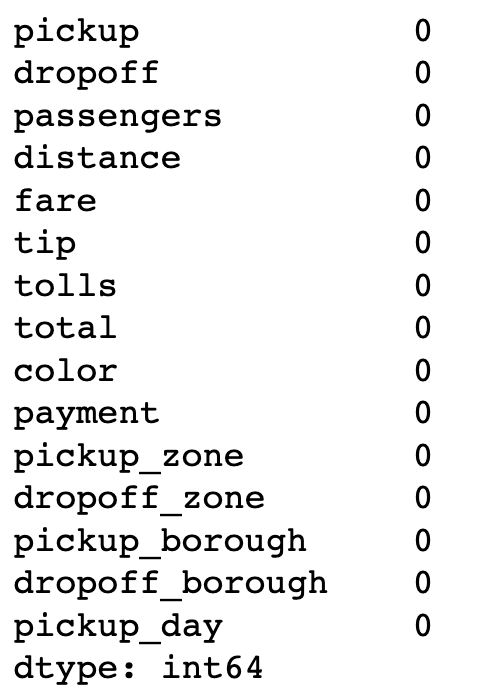

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [11]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

In [12]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Після виконання завдання запустіть наступну клітинку:

In [13]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

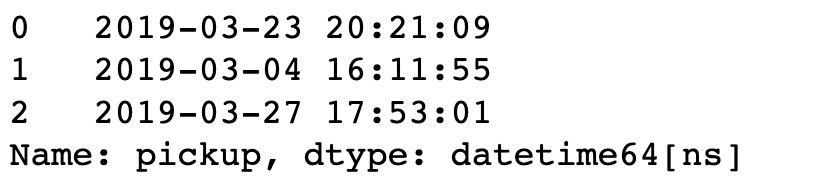

5.У нас колонка pickup зараз містить дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [14]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

In [15]:
df_taxi_clean['pickup_day']

0      2019-03-23
1      2019-03-04
2      2019-03-27
3      2019-03-10
4      2019-03-30
          ...    
6428   2019-03-31
6429   2019-03-31
6430   2019-03-23
6431   2019-03-04
6432   2019-03-13
Name: pickup_day, Length: 6433, dtype: datetime64[ns]

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

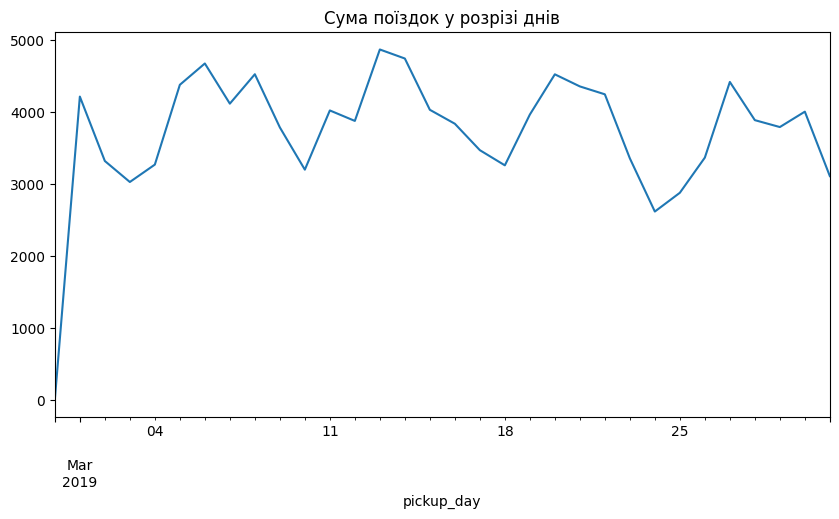

In [16]:
graphic1 = df_taxi_clean.groupby('pickup_day')['total'].sum()

graphic1.plot(figsize = (10, 5))
plt.title('Сума поїздок у розрізі днів');

# відкривши календарь за Березень 2019 року, то побачив, що різкий спад йде з пʼятницю до понеділка і знов зріст, і так кожен тиждень, що досить дивно, було на початку, якщо не згадати, що дані йдуть з Нью-Йорку, бо у цьому місті досить часте йде використання таксі для потреб переміщення по роботі, а у вихідні певно йде спад, бо все ж таки мова з огляду на цей графік йде більше про робочі поїздки ніж про використання таксі для відпочинку, тощо

Очікується графік:

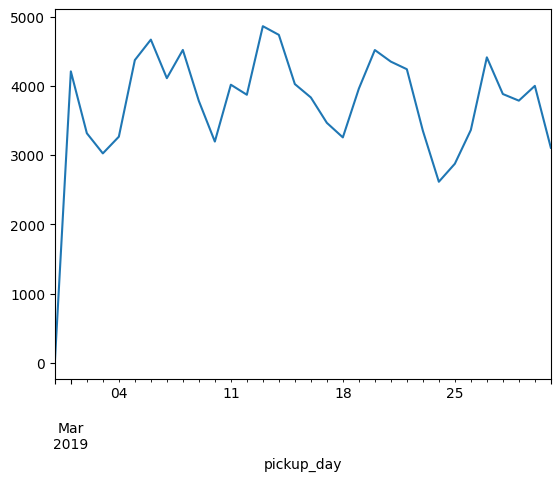

6.Виведіть кількість рядків для кожного pickup_day.

In [17]:
df_taxi_clean['pickup_day'].value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [18]:
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day != '2019-02-28']

In [19]:
# перевірка

df_taxi_clean['pickup_day'].value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-23    209
2019-03-11    209
2019-03-29    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
Name: pickup_day, dtype: int64

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [53]:
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_borough != 'NA']
borough_pivot = df_taxi_clean.pivot_table(index = 'pickup_day', columns = 'pickup_borough', values = 'total', aggfunc = np.sum)

borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

Найбільш прибутковий район - Мангеттен.

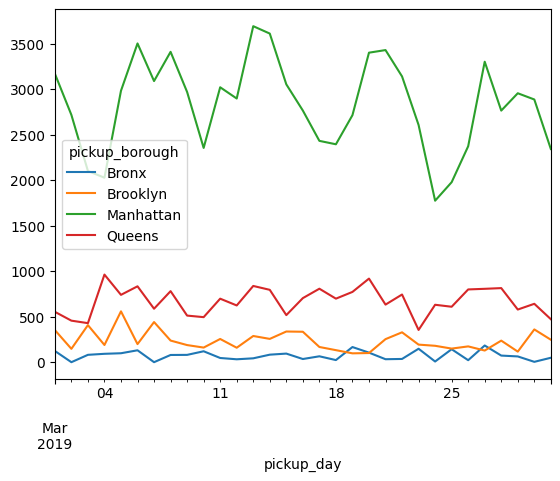

In [54]:
borough_pivot.fillna(0).plot();

# відповідь вище

Очікуваний графік :

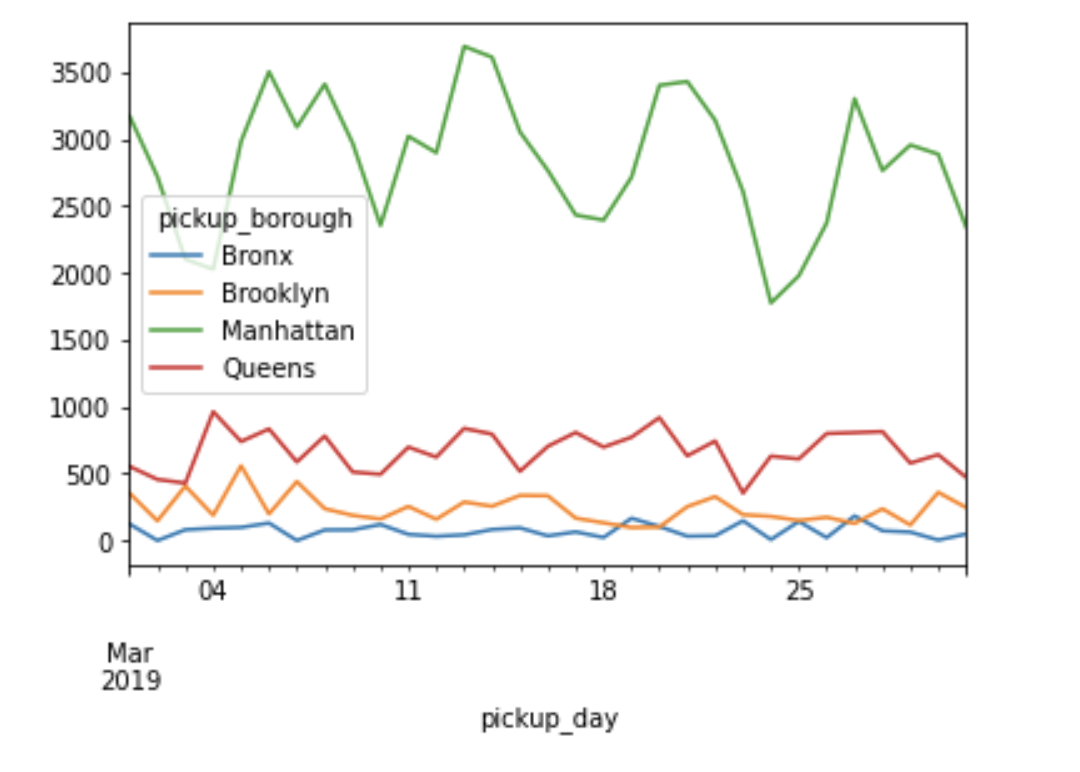

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

К-сть bins = 6 є найбільш вдалою через те, що відстуні пусті значення на кожному з графіків.

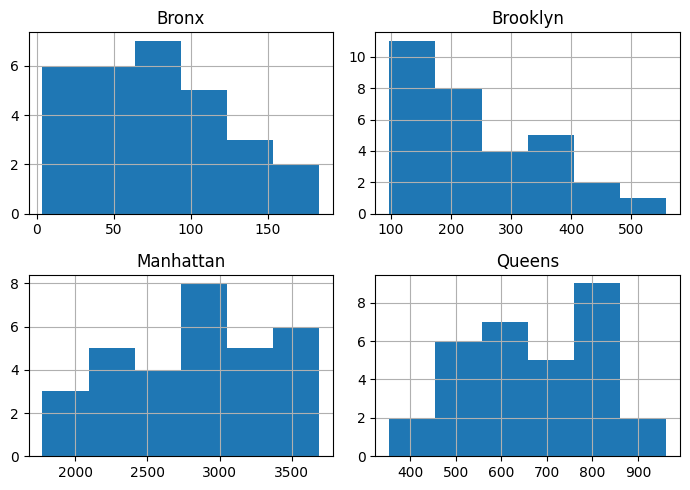

In [104]:
borough_pivot.hist(bins = 6, figsize = (7, 5));
plt.tight_layout();

# відповідь по к-сті bins вище

Приклад одного з правильних виконань завдання:

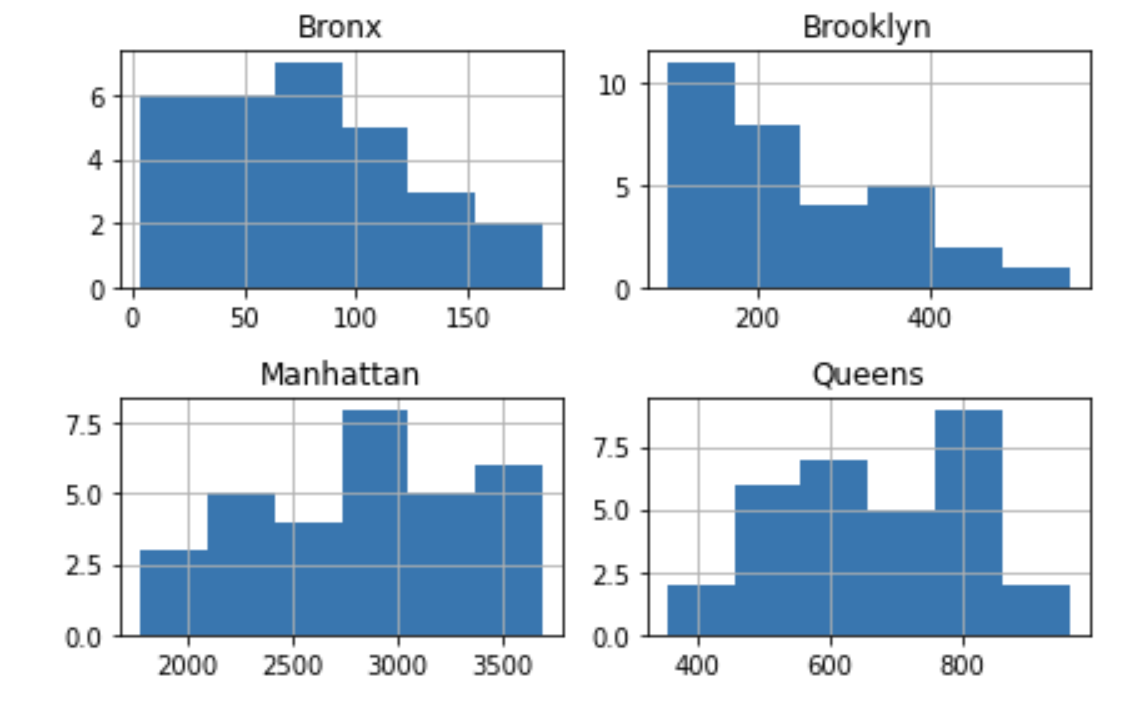

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

In [271]:
plt.figure(figsize=(12,6), dpi = 1000)
for col in borough_pivot.columns:
    if col != 'total':
        plt.hist(borough_pivot[col], bins=6, alpha=0.5, label=col)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.legend()
plt.show()

Очікуваний результат:

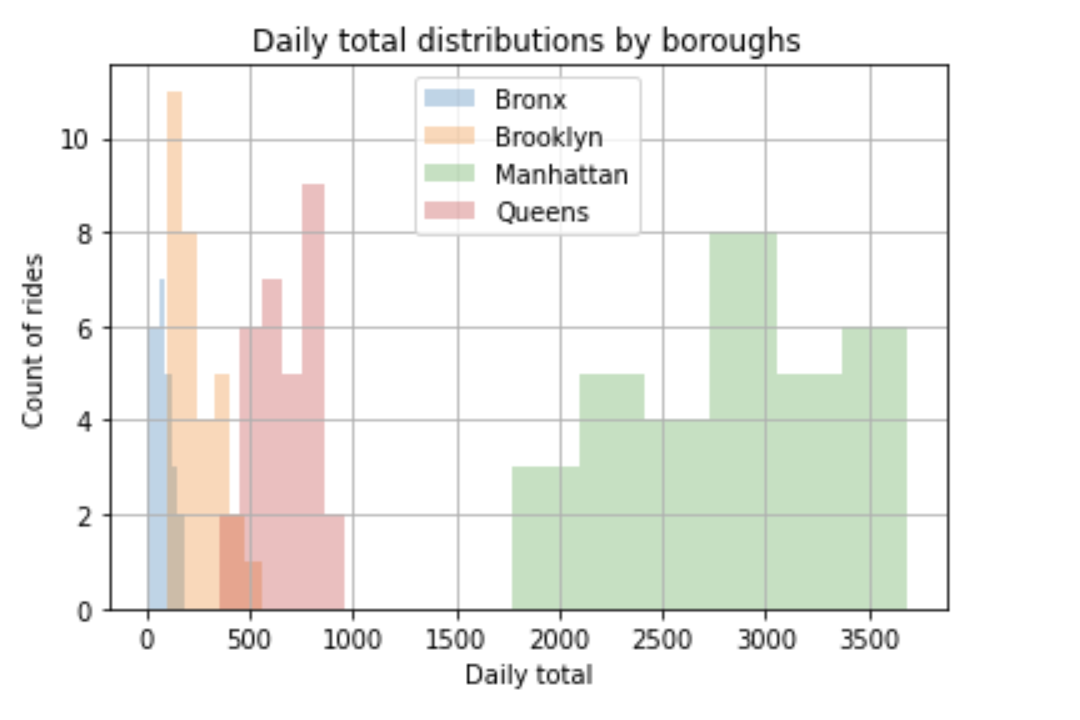

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

In [275]:
plt.figure(figsize=(12,6), dpi = 1000)
for col in borough_pivot.columns:
    if col != 'total':
        sns.histplot(borough_pivot[col], bins=6, alpha=0.5, label=col)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.legend()
plt.show()

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

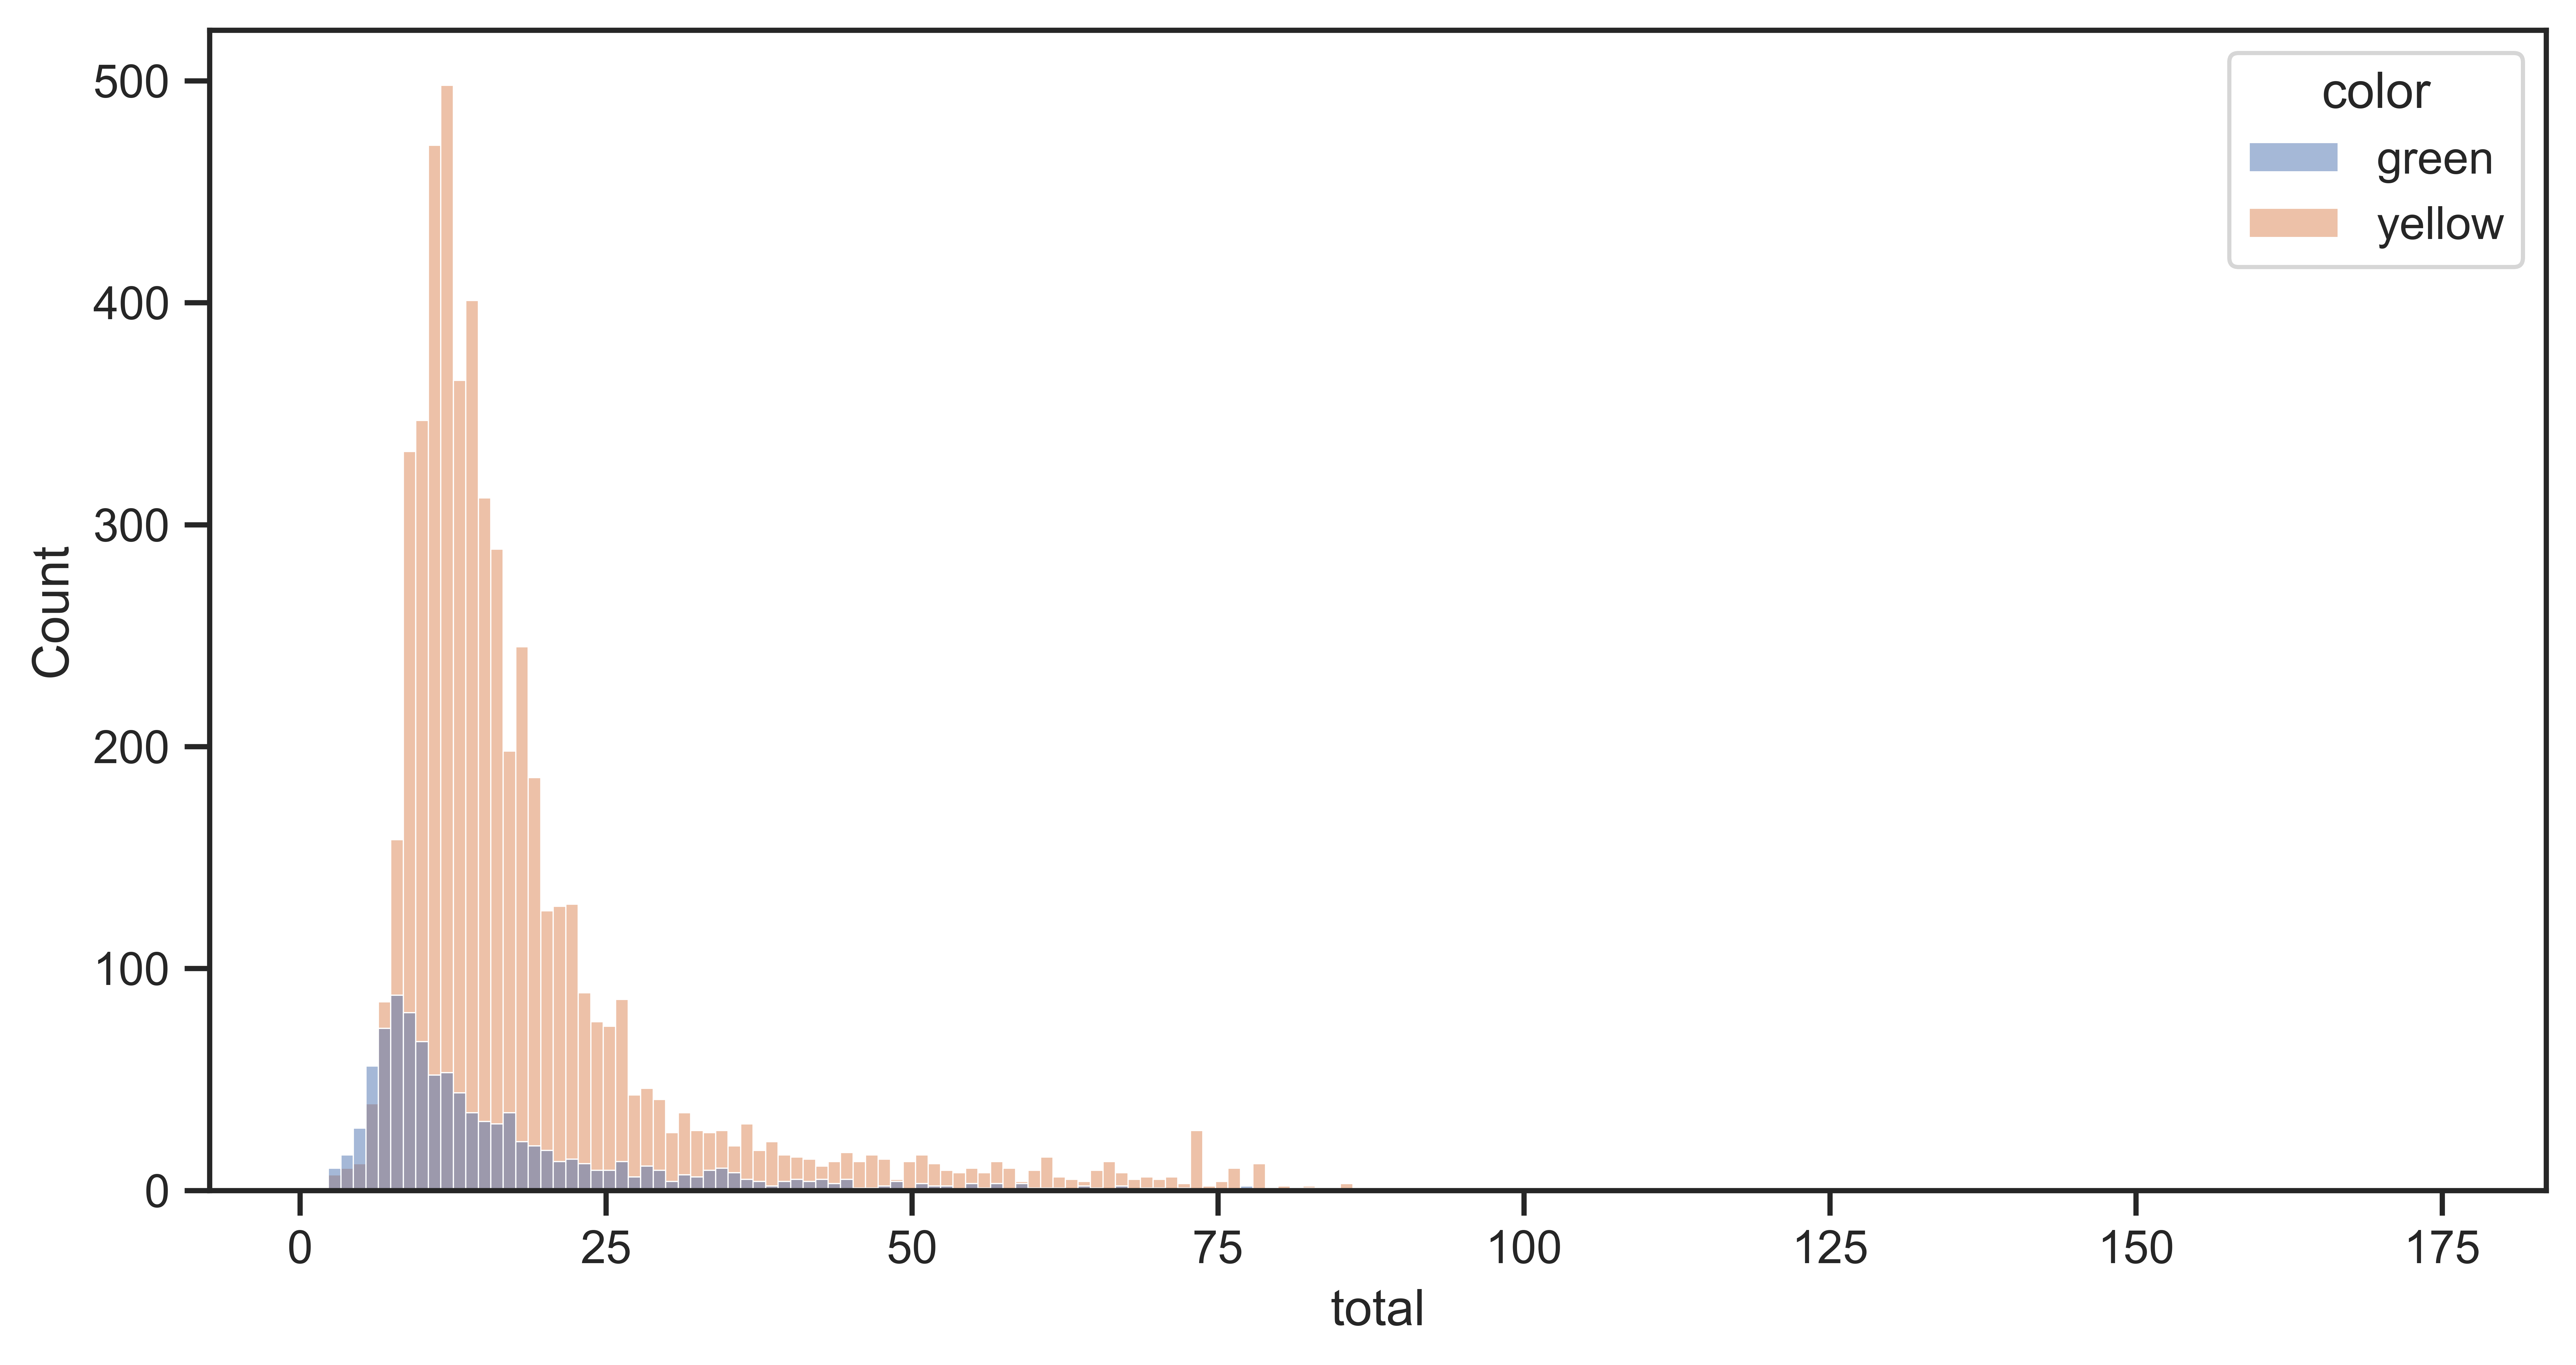

In [274]:
df_taxi_clean_v2 = df_taxi_clean.sort_values(by = 'color', ascending = True)

plt.figure(figsize=(10, 5), dpi = 1000) 
sns.histplot(data = df_taxi_clean_v2, x = 'total', hue = 'color');

Очікуваний результат:

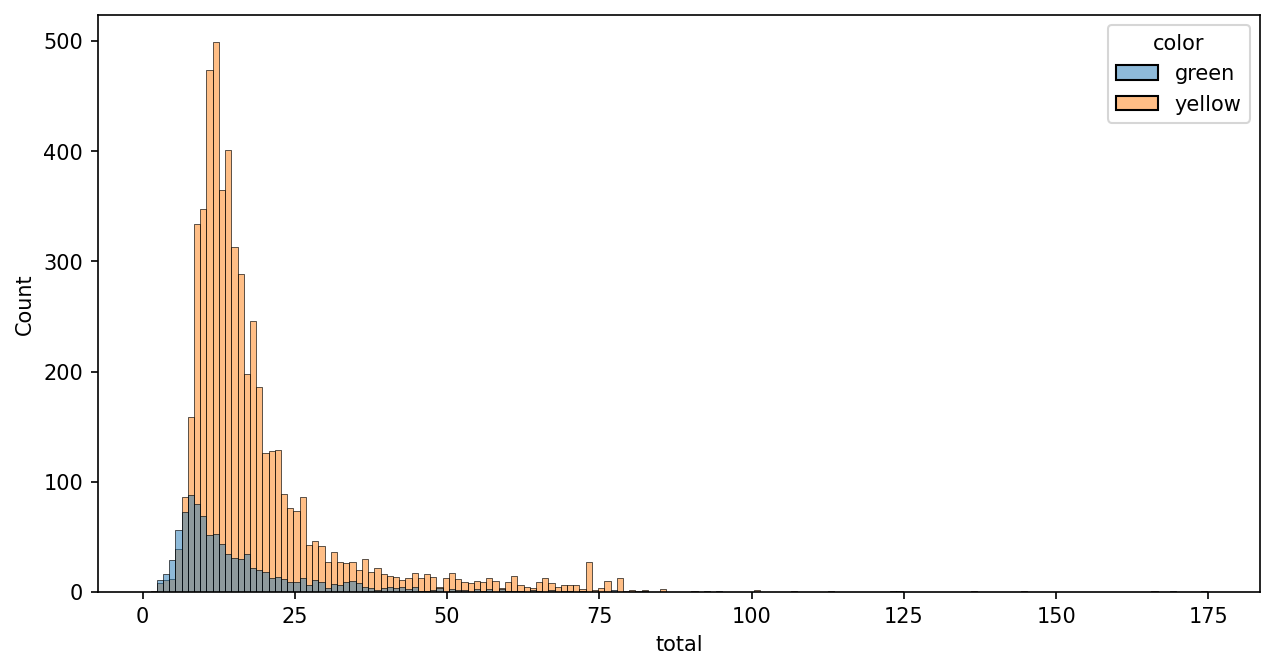

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `scatter_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

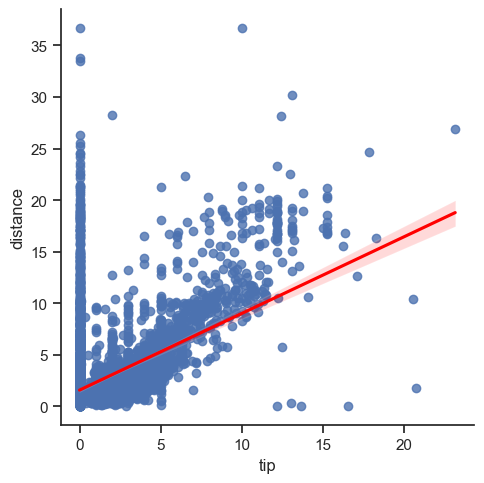

In [142]:
sns.lmplot(data = df_taxi_clean, x = 'tip', y = 'distance', line_kws={"color": "red"});

Один з можливих результатів (побудовано з seaborn):

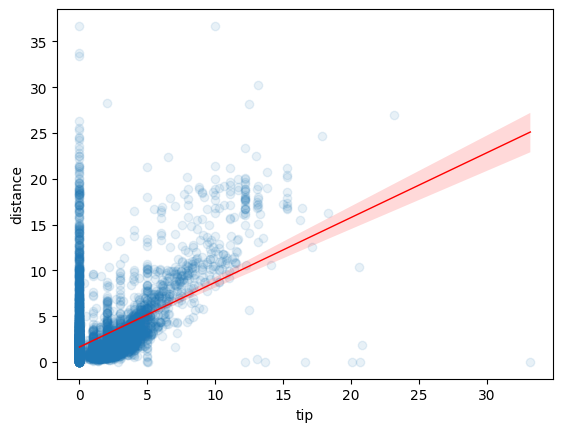

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Це залежність розміру чайових від дальності поїздки. Якщо прибрати 0-ві показники чайових, то можна бачити залежність розміру чайових від дальності поїздки, що і підтверджує лінія тренду.
Іншими словами, якщо я викликав таксі для поїздки до 5-км, то мої чайові складуть до 2-3 доларів, а якщо я викликав таксі для поїздки на 20 км, то мої чайові складуть найчастіще 11-13 доларів.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

1. найрідші чайові у Бронксі, і це максимально відображає графік;
2. найчастіші чайові у районі Квінс;
3. найстабільніші чайові у районі Мангеттену і мінімальні зміни на протязі періоду;

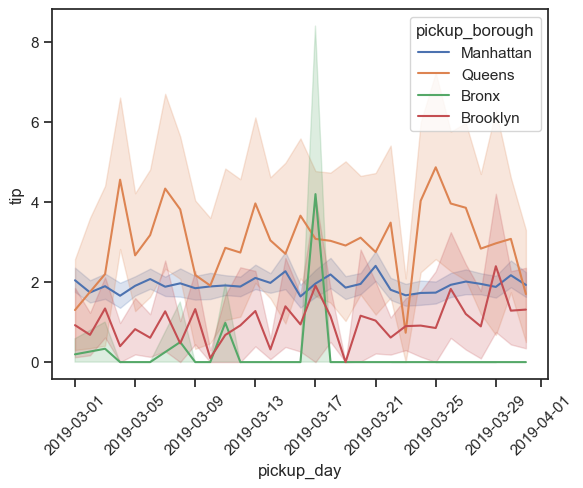

In [141]:
# відповідь вище

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.lineplot(data = df_taxi_clean, x = 'pickup_day', y = 'tip', hue = 'pickup_borough');

Один з можливих результатів (побудовано з seaborn):

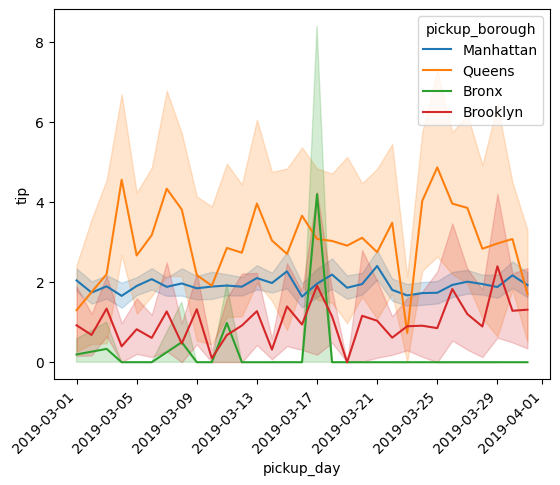

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

<AxesSubplot: xlabel='pickup_borough', ylabel='tip'>

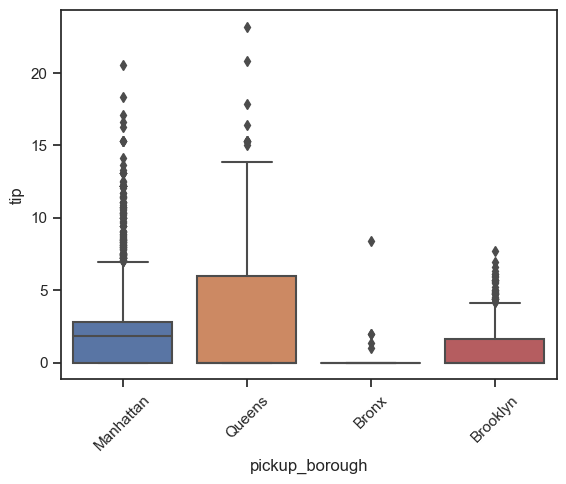

In [140]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.boxplot(data = df_taxi_clean, x = 'pickup_borough', y = 'tip')

Один з можливих результатів (побудовано з seaborn):

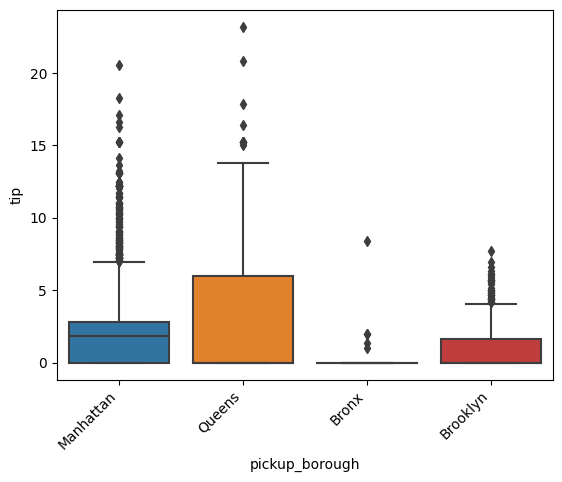

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

# 1. Пошук залежності дистанції та чайових під час поїздок у розрізі районів

За допомогою додаткового графіку до того який був у завданні 13, я побудував такий самий графік, але із залежністю по дистанції і вивів їх поряд для більш кращого розуміння.
Таким чином можна побачити, що на Мангеттені найбільш короткі поїздки та стабільні чайові, тобто можна зробити висновок, що це скоріш за все діловий район чи багатий район і їздять скоріш за все лише по ньому чи до максимально билзьких районів поряд із ним і це стабільний дохід для таксистів.
У Квінс стабільно великі дистанції поїздок і також високі чайові, тобто скоріш за все це може бути район віддалений чи певно район який дуже населений для життя, але віддалений від центру чи роботи, тощо.
Бронкс є найбільш не привабливим для таксиста районом через достатньо великі дистанції та майже відстуність чайових чи їх мінімальну к-сть.

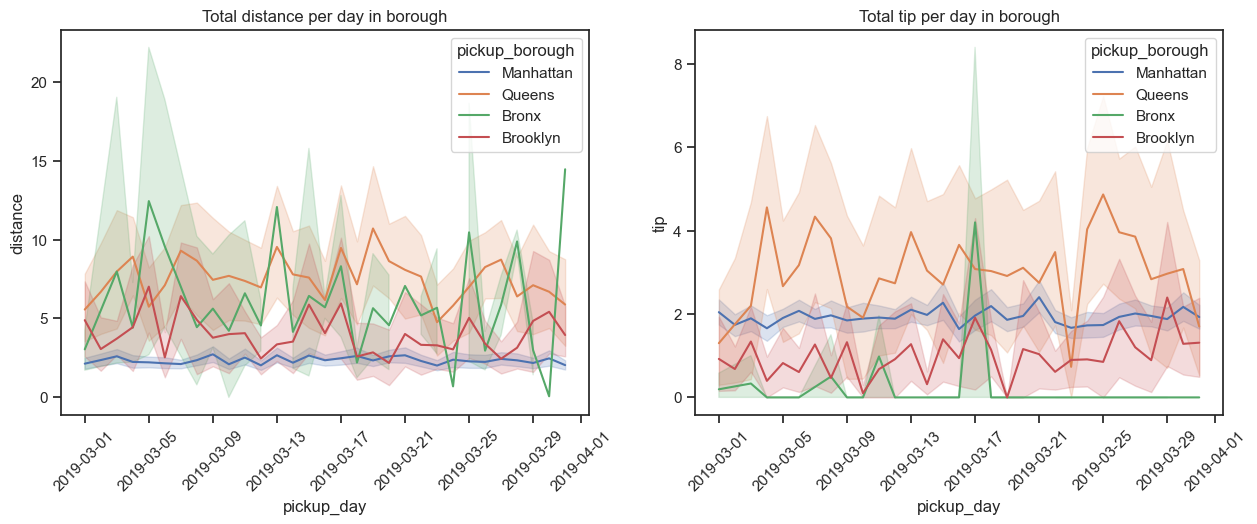

In [257]:
# відповідь вище

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.lineplot(data=df_taxi_clean, x='pickup_day', y='distance', hue='pickup_borough', ax=axes[0])
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Total distance per day in borough')

sns.lineplot(data=df_taxi_clean, x='pickup_day', y='tip', hue='pickup_borough', ax=axes[1])
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Total tip per day in borough')

plt.show()

# 2. Розрахунки за типом по районам

Нижня візуалізація демонструє у якому районі, яким типом проводять оплату і можна бачити, що на Мангеттену найбільші суми і максимальна к-сть оплат за допомогою кредитних карток.
В цілому в кожному із районів дуже популярним є оплата саме кредитною карткою і тим самим це дає нам можливість опрацюват цю інформацію для можливих якихось акцій чи перевірку автівок на наявність у кожній терміналу для оплати послуг (якщо це працює не через додаток).

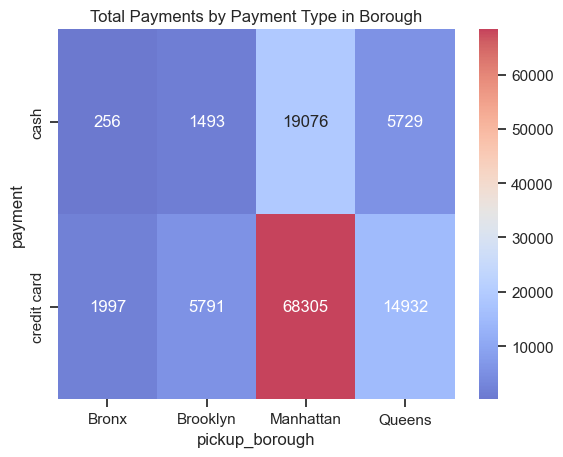

In [218]:
# відповідь вище

pivot_1 = df_taxi_clean.pivot_table(index = 'payment', columns = 'pickup_borough', values = 'total', aggfunc = np.sum)
pivot_1 = pivot_1.drop('NA', axis=0)

sns.heatmap(pivot_1, annot=True, fmt=".0f", cmap="coolwarm", alpha = 0.75)
plt.title('Total Payments by Payment Type in Borough')
plt.show()

# 3. Порівняння к-сті пасажирів по дням із доходом таксі

Було створено два графіки для того аби побачити чи існує пряма залежність від к-сті пасажирів та доходу у тому чи іншому районі міста.
Видно, що на Мангеттені дуже велике скупчення пасажирів, а також високі ціни і тут є пряма залежність, бо видно на графіку, коли падає к-сть пасажирів, таке ж зниження і доходу таксистів.
Бронкс максимально стабільний, невелика к-сть пасажирів і маленький дохід.
Бруклін трошки краще себе демонструє ніж Бронкс, але суть така сама, невеликий потік пасажирів і невеликі суми доходу для таксистів.
Квінс має як і Бронкс та Бруклін стабільну к-сть пасажирів яка трохи перевищує попередні два райони, але суми доходу таксистів мають достатні коливання які повторюють коливання на Мангеттені, що дає розуміння про використання таксі частіше у робочі дні ніж у вихідні.

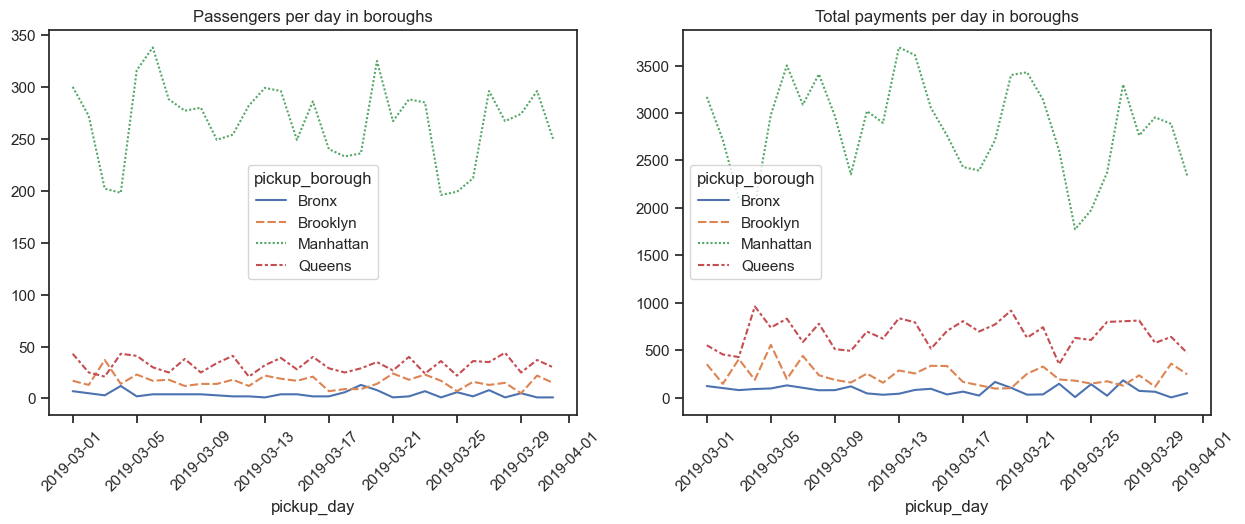

In [255]:
# відповідь вище

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

pivot_2 = df_taxi_clean.pivot_table(index = 'pickup_day', columns = 'pickup_borough', values = 'passengers', aggfunc = np.sum)
pivot_3 = df_taxi_clean.pivot_table(index = 'pickup_day', columns = 'pickup_borough', values = 'total', aggfunc = np.sum)

sns.lineplot(data = pivot_2, ax=axes[0]);
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Passengers per day in boroughs')

sns.lineplot(data = pivot_3, ax=axes[1]);
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Total payments per day in boroughs')

plt.show()